## Age Count by State

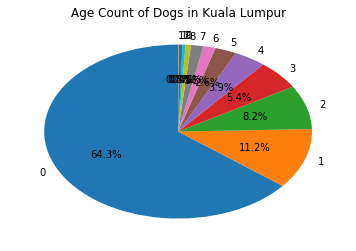

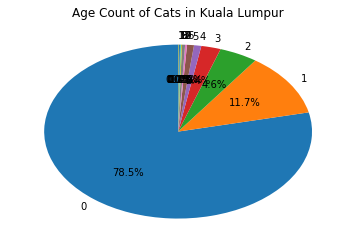

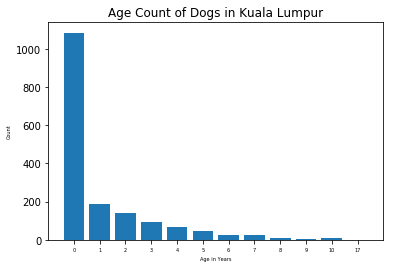

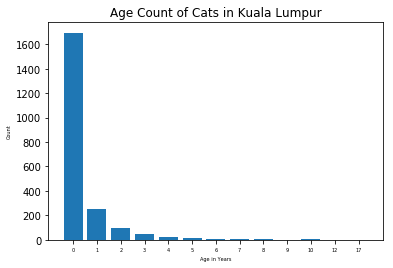

In [46]:
def state_age_count(state) :
    
    """
    Plots bar graphs and pie charts containing distribution of dogs and cats at different ages
    in a specified state
    
    :param state: str specifies which state to display data about
    
    """

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import itertools
    
    assert isinstance(state, str)

    train = pd.read_csv('./data/train.csv')
    state_labels = pd.read_csv('./data/state_labels.csv')

    
    # Dictionary for state labels
    state_dict = dict(zip(state_labels["StateName"], state_labels["StateID"]))

    assert state in state_dict, "state not in state dictionary"
    
    # Split data to only contain given state data
    this_state = train.loc[train['State'] == state_dict[state],
                                ['State','Type', 'Age', 'AdoptionSpeed']]

    this_state.loc[this_state['Age'] > -1, 'Age'] = (this_state['Age']//12)
    
    # Divide by dog (Type = 1) and cat (Type = 2)
    dog_df = this_state.loc[this_state['Type'] == 1, :]
    cat_df = this_state.loc[this_state['Type'] == 2, :]
    
    dog_max_age = max(dog_df.loc[:, 'Age'])
    dog_min_age = min(dog_df.loc[:, 'Age'])
    
    cat_max_age = max(cat_df.loc[:, 'Age'])
    cat_min_age = min(cat_df.loc[:, 'Age'])
    
    dog_age_labels = []
    dog_count = []
    
    cat_age_labels = []
    cat_count = []
    
    # Find dog count for each age
    for i in range(dog_min_age, dog_max_age + 1) :
        count = (dog_df.Age == i).sum()
        if(count > 0) :
            dog_count.append(count)
            dog_age_labels.append(i)

    # Find cat count for each age
    for i in range(cat_min_age, cat_max_age + 1) :
        count = (cat_df.Age == i).sum()
        if(count > 0) :
            cat_count.append(count)
            cat_age_labels.append(i)
            
    # Plot pie charts
    plt.figure()
    plt.pie(dog_count, labels = dog_age_labels, startangle=90, autopct='%.1f%%')
    plt.title('Age Count of Dogs in ' + state)
    plt.show()
    
    plt.figure()
    plt.pie(cat_count, labels = cat_age_labels, startangle=90, autopct='%.1f%%')
    plt.title('Age Count of Cats in ' + state)
    plt.show()
    
    # Plot bar graphs
    plt.figure()
    index = np.arange(len(dog_age_labels))
    plt.bar(index, dog_count)
    plt.xlabel('Age in Years', fontsize = 5)
    plt.xticks(index, dog_age_labels, fontsize = 5)
    plt.ylabel('Count', fontsize = 5)
    plt.title('Age Count of Dogs in ' + state)
    
    
    plt.figure()
    index = np.arange(len(cat_age_labels))
    plt.bar(index, cat_count)
    plt.xlabel('Age in Years', fontsize = 5)
    plt.xticks(index, cat_age_labels, fontsize = 5)
    plt.ylabel('Count', fontsize = 5)
    plt.title('Age Count of Cats in ' + state)
    

state_age_count('Kuala Lumpur')
# state_age_count('Selangor')
# state_age_count('Pulau Pinang')

## Age Count in Total Data

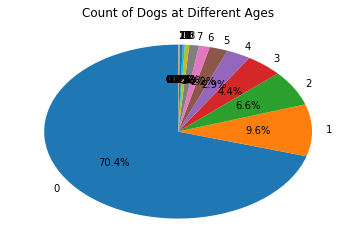

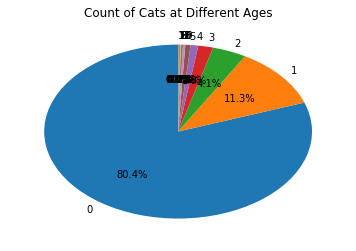

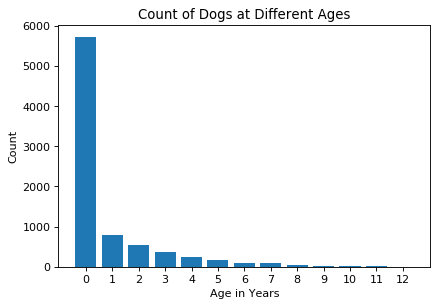

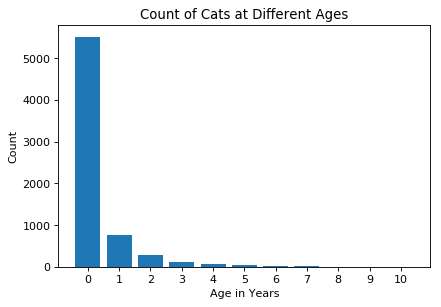

In [2]:
def train_age_count():
        
    """
    Plots bar graphs and pie charts containing distribution of dogs and cats at different ages
    in total dataset
    
    """

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import itertools

    train = pd.read_csv('./data/train.csv')
    color_labels = pd.read_csv('./data/color_labels.csv')
    state_labels = pd.read_csv('./data/state_labels.csv')

    # Convert age from months to years
    train.loc[train['Age'] > -1, 'Age'] = (train['Age']//12)
    
    # Divide by dog (Type = 1) and cat (Type = 2)
    dog_df = train.loc[train['Type'] == 1, ['State','Type', 'Age', 'AdoptionSpeed']]
    cat_df = train.loc[train['Type'] == 2, ['State','Type', 'Age', 'AdoptionSpeed']]
    
    dog_max_age = max(dog_df.loc[:, 'Age'])
    dog_min_age = min(dog_df.loc[:, 'Age'])
    
    cat_max_age = max(cat_df.loc[:, 'Age'])
    cat_min_age = min(cat_df.loc[:, 'Age'])
    
    dog_age_labels = []
    dog_count = []
    
    cat_age_labels = []
    cat_count = []
    
    # Find dog count for each age
    for i in range(dog_min_age, dog_max_age + 1) :
        count = (dog_df.Age == i).sum()
        if(count > 0) :
            dog_count.append(count)
            dog_age_labels.append(i)

    # Find cat count for each age
    for i in range(cat_min_age, cat_max_age + 1) :
        count = (cat_df.Age == i).sum()
        if(count > 0) :
            cat_count.append(count)
            cat_age_labels.append(i)
            
    # Plot pie charts
    plt.figure()
    plt.pie(dog_count, labels = dog_age_labels, startangle=90, autopct='%.1f%%')
    plt.title('Count of Dogs at Different Ages')
    plt.show()
    
    plt.figure()
    plt.pie(cat_count, labels = cat_age_labels, startangle=90, autopct='%.1f%%')
    plt.title('Count of Cats at Different Ages')
    plt.show()
    
    
    
    # Plot bar graphs
    
    plt.figure(num = None, figsize=(6,4),dpi=80, facecolor = 'w', edgecolor='k')
    index = np.arange(len(dog_age_labels))
    
    index = index[0:13]
    dog_age_labels = dog_age_labels[0:13]
    dog_count = dog_count[0:13]
    
    plt.bar(index, dog_count)
    plt.xlabel('Age in Years')
    plt.xticks(index, dog_age_labels)
    plt.ylabel('Count')
    plt.title('Count of Dogs at Different Ages')
    plt.savefig('dogAgeCount.png', bbox_inches='tight')
    
    plt.figure(num = None, figsize=(6,4),dpi=80, facecolor = 'w', edgecolor='k')
    index = np.arange(len(cat_age_labels))
    
    index = index[0:11]
    cat_age_labels = cat_age_labels[0:11]
    cat_count = cat_count[0:11]
    
    plt.bar(index, cat_count)
    plt.xlabel('Age in Years')
    plt.xticks(index, cat_age_labels)
    plt.ylabel('Count')
    plt.title('Count of Cats at Different Ages')
    plt.savefig('catAgeCount.png', bbox_inches='tight')
    plt.show()
    
train_age_count()

## Average Adoption Speed for Each Age

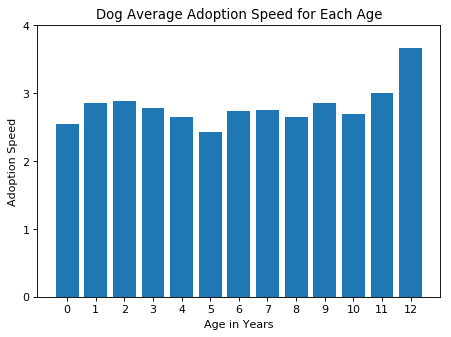

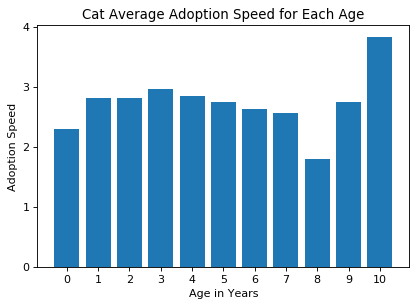

In [7]:
def age_avg_adopt():
    
    """
    Plots bar graphs of average adoption speed for ages available in dataset. 
    The plots are divided between dogs and cats.
    
    The adoption speed scale is 0-4 where 0 means immediate adoption and 4 means no adoption after
    91 days at the shelter.
    
    """
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    train = pd.read_csv('./data/train.csv')
    
    # Convert age from months to years
    train.loc[train['Age'] > -1, 'Age'] = (train['Age']//12)
    
    # Divide by dog (Type = 1) and cat (Type = 2)
    dog_df = train.loc[train['Type'] == 1, ['State','Type', 'Age', 'AdoptionSpeed']]
    cat_df = train.loc[train['Type'] == 2, ['State','Type', 'Age', 'AdoptionSpeed']]
    
    dog_max_age = max(dog_df.loc[:, 'Age'])
    dog_min_age = min(dog_df.loc[:, 'Age'])
    
    cat_max_age = max(cat_df.loc[:, 'Age'])
    cat_min_age = min(cat_df.loc[:, 'Age'])
    
    dog_age_labels = []
    dog_avg = []
    
    cat_age_labels = []   
    cat_avg = []
    

    # Find dog average adoption speed by age
    for i in range(dog_min_age, dog_max_age + 1) :
        
        count = (dog_df.Age == i).sum()
        if(count > 0) :
            dog_avg.append(dog_df.loc[dog_df['Age'] == i, ['AdoptionSpeed']].mean()[0])
            dog_age_labels.append(i)

    # Plot bar graphs
    yticks_index = list(range(5))
    
    plt.figure(num = None, figsize=(6.5,4.5),dpi=80, facecolor = 'w', edgecolor='k')
    index = np.arange(len(dog_age_labels))
    
    index = index[0:13]
    dog_age_labels = dog_age_labels[0:13]
    dog_avg = dog_avg[0:13]
    
    plt.bar(index, dog_avg)
    plt.xlabel('Age in Years')
    plt.xticks(index, dog_age_labels)
    plt.ylabel('Adoption Speed')
    plt.yticks(yticks_index)
    plt.title('Dog Average Adoption Speed for Each Age')
    plt.savefig('bardogAvg.png', bbox_inches='tight')

    # Find cat average adoption speed by age
    for i in range(cat_min_age, cat_max_age + 1) :
        
        count = (cat_df.Age == i).sum()
        if(count > 0) :
            cat_avg.append(cat_df.loc[cat_df['Age'] == i, ['AdoptionSpeed']].mean()[0])
            cat_age_labels.append(i)

    plt.figure(num = None, figsize=(6,4),dpi=80, facecolor = 'w', edgecolor='k')
    index = np.arange(len(cat_age_labels))
    
    
    index = index[0:11]
    cat_age_labels = cat_age_labels[0:11]
    cat_avg = cat_avg[0:11]
    
    plt.bar(index, cat_avg)
    plt.xlabel('Age in Years')
    plt.xticks(index, cat_age_labels)
    plt.ylabel('Adoption Speed')
    plt.yticks(yticks_index)
    plt.title('Cat Average Adoption Speed for Each Age')
    plt.savefig('barcatAvg.png', bbox_inches='tight')
    
    
         
age_avg_adopt()

## 12 Month Average Adoption Speed

## 12 Month Count

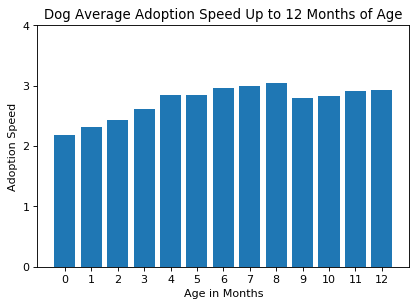

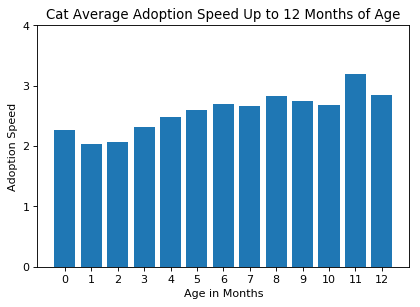

In [8]:
def age_avg_adopt():
    
    """
    Plots bar graphs of average adoption speed for every month in the first 12 months of the pet's life.
    The plots are divided between dogs and cats.
    
    The adoption speed scale is 0-4 where 0 means immediate adoption and 4 means no adoption after
    91 days at the shelter.
    
    """
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    train = pd.read_csv('./data/train.csv')
    
    train_12_months = train.loc[train['Age'] < 13, ['State','Type', 'Age', 'AdoptionSpeed']]
    
    dog_df = train_12_months.loc[train_12_months['Type'] == 1, :]
    cat_df = train_12_months.loc[train_12_months['Type'] == 2, :]
    
    
    dog_max_age = max(dog_df.loc[:, 'Age'])
    dog_min_age = min(dog_df.loc[:, 'Age'])
    
    cat_max_age = max(cat_df.loc[:, 'Age'])
    cat_min_age = min(cat_df.loc[:, 'Age'])
    
    dog_age_labels = []
    dog_avg = []
    
    cat_age_labels = []   
    cat_avg = []
    
    
    # Bar Graphs
    a = list(range(5))
    # Find dog average adoption speed by age
    for i in range(dog_min_age, dog_max_age + 1) :
        
        count = (dog_df.Age == i).sum()
        if(count > 0) :
            dog_avg.append(dog_df.loc[dog_df['Age'] == i, ['AdoptionSpeed']].mean()[0])
            dog_age_labels.append(i)

    plt.figure(num = None, figsize=(6,4),dpi=80, facecolor = 'w', edgecolor='k')
    index = np.arange(len(dog_age_labels))
    plt.bar(index, dog_avg)
    plt.xlabel('Age in Months')
    plt.xticks(index, dog_age_labels)
    plt.ylabel('Adoption Speed')
    plt.yticks(a)
    plt.title('Dog Average Adoption Speed Up to 12 Months of Age')
    plt.savefig('bardog12avg.png', bbox_inches='tight')
    

    # Find cat average adoption speed by age
    for i in range(cat_min_age, cat_max_age + 1) :
        
        count = (cat_df.Age == i).sum()
        if(count > 0) :
            cat_avg.append(cat_df.loc[cat_df['Age'] == i, ['AdoptionSpeed']].mean()[0])
            cat_age_labels.append(i)

    plt.figure(num = None, figsize=(6,4),dpi=80, facecolor = 'w', edgecolor='k')
    index = np.arange(len(cat_age_labels))
    plt.bar(index, cat_avg)
    plt.xlabel('Age in Months')
    plt.xticks(index, cat_age_labels)
    plt.ylabel('Adoption Speed')
    plt.yticks(a)
    plt.title('Cat Average Adoption Speed Up to 12 Months of Age')
    plt.savefig('barcat12avg.png', bbox_inches='tight')
     
    
age_avg_adopt()

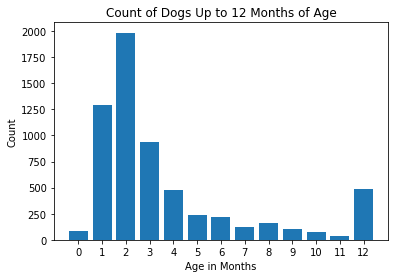

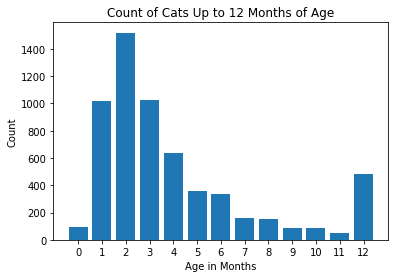

In [5]:
def age_12_count() :
    
    """
    Plots bar graphs of count of pets below 12 months. The bar graphs are divided between dogs and cats.
    """

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import itertools

    train = pd.read_csv('./data/train.csv')
    
    # Split data to contain ages only up to 12 months
    train_12_months = train.loc[train['Age'] < 13, ['State','Type', 'Age', 'AdoptionSpeed']]

    # Divide by dog (Type = 1) and cat (Type = 2)
    dog_df = train_12_months.loc[train_12_months['Type'] == 1, :]
    cat_df = train_12_months.loc[train_12_months['Type'] == 2, :]
    
    dog_max_age = max(dog_df.loc[:, 'Age'])
    dog_min_age = min(dog_df.loc[:, 'Age'])
    
    cat_max_age = max(cat_df.loc[:, 'Age'])
    cat_min_age = min(cat_df.loc[:, 'Age'])
    
    dog_age_labels = []
    dog_count = []
    
    cat_age_labels = []
    cat_count = []
    
    # Find dog count for each age
    for i in range(dog_min_age, dog_max_age + 1) :
        count = (dog_df.Age == i).sum()
        if(count > 0) :
            dog_count.append(count)
            dog_age_labels.append(i)

    # Find cat count for each age
    for i in range(cat_min_age, cat_max_age + 1) :
        count = (cat_df.Age == i).sum()
        if(count > 0) :
            cat_count.append(count)
            cat_age_labels.append(i)
            
    # Plot bar graphs
    plt.figure()
    index = np.arange(len(dog_age_labels))
    plt.bar(index, dog_count)
    plt.xlabel('Age in Months')
    plt.xticks(index, dog_age_labels)
    plt.ylabel('Count')
    plt.title('Count of Dogs Up to 12 Months of Age')
    plt.savefig('dog12.png', bbox_inches='tight')
    
    
    plt.figure()
    index = np.arange(len(cat_age_labels))
    plt.bar(index, cat_count)
    plt.xlabel('Age in Months')
    plt.xticks(index, cat_age_labels)
    plt.ylabel('Count')
    plt.title('Count of Cats Up to 12 Months of Age')
    plt.savefig('cat12.png', bbox_inches='tight')
    
age_12_count()   
    